# Mining Process: Machine Learning and Analysis

# Import Library & Dataset

In [135]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures, RobustScaler
from sklearn.linear_model import LinearRegression, Ridge, SGDRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import log_loss, mean_squared_error

In [69]:
df = pd.read_csv('./input/MiningProcess_Flotation_Plant_Database.csv',
                 decimal=",",
                 parse_dates=["date"],
                 infer_datetime_format=True)

# EDA

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 737453 entries, 0 to 737452
Data columns (total 24 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   date                          737453 non-null  datetime64[ns]
 1   % Iron Feed                   737453 non-null  float64       
 2   % Silica Feed                 737453 non-null  float64       
 3   Starch Flow                   737453 non-null  float64       
 4   Amina Flow                    737453 non-null  float64       
 5   Ore Pulp Flow                 737453 non-null  float64       
 6   Ore Pulp pH                   737453 non-null  float64       
 7   Ore Pulp Density              737453 non-null  float64       
 8   Flotation Column 01 Air Flow  737453 non-null  float64       
 9   Flotation Column 02 Air Flow  737453 non-null  float64       
 10  Flotation Column 03 Air Flow  737453 non-null  float64       
 11  Flotation Col

In [71]:
df['time_date'] = df['date'].dt.date
df['time_o_clock'] = df.date.dt.hour

In [72]:
df['time_date'].value_counts()

2017-06-16    4320
2017-07-18    4320
2017-07-10    4320
2017-07-11    4320
2017-07-12    4320
              ... 
2017-05-23    4320
2017-04-10    4319
2017-03-10    4134
2017-03-29    2160
2017-03-16    1080
Name: time_date, Length: 172, dtype: int64

<AxesSubplot:>

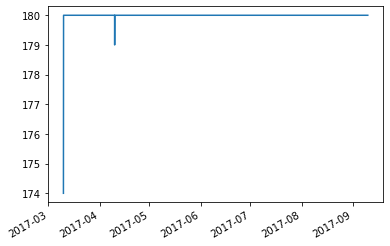

In [74]:
df['date'].value_counts().plot()

In [75]:
df['date'].value_counts()

2017-06-16 15:00:00    180
2017-06-16 16:00:00    180
2017-07-14 18:00:00    180
2017-07-14 19:00:00    180
2017-07-14 20:00:00    180
                      ... 
2017-05-19 11:00:00    180
2017-05-19 12:00:00    180
2017-05-19 13:00:00    180
2017-04-10 00:00:00    179
2017-03-10 01:00:00    174
Name: date, Length: 4097, dtype: int64

基本上每20s會有一筆資料，不知為何有些時候會缺少record，但是本次所進行機器學習建模不考慮時間對其成果產出的影響性  
忘記從哪邊的資料顯示，大概10分鐘左右就可以完成這些製程?

In [76]:
df.drop(columns = {'time_date', 'time_o_clock'}, inplace= True)
df.drop(columns = {'date'}, inplace= True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 737453 entries, 0 to 737452
Data columns (total 23 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   % Iron Feed                   737453 non-null  float64
 1   % Silica Feed                 737453 non-null  float64
 2   Starch Flow                   737453 non-null  float64
 3   Amina Flow                    737453 non-null  float64
 4   Ore Pulp Flow                 737453 non-null  float64
 5   Ore Pulp pH                   737453 non-null  float64
 6   Ore Pulp Density              737453 non-null  float64
 7   Flotation Column 01 Air Flow  737453 non-null  float64
 8   Flotation Column 02 Air Flow  737453 non-null  float64
 9   Flotation Column 03 Air Flow  737453 non-null  float64
 10  Flotation Column 04 Air Flow  737453 non-null  float64
 11  Flotation Column 05 Air Flow  737453 non-null  float64
 12  Flotation Column 06 Air Flow  737453 non-nul

In [77]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
% Iron Feed,737453.0,56.294739,5.157744,42.740000,52.670,56.080000,59.720,65.780
% Silica Feed,737453.0,14.651716,6.807439,1.310000,8.940,13.850000,19.600,33.400
Starch Flow,737453.0,2869.140569,1215.203734,0.002026,2076.320,3018.430000,3727.730,6300.230
Amina Flow,737453.0,488.144697,91.230534,241.669000,431.796,504.393000,553.257,739.538
Ore Pulp Flow,737453.0,397.578372,9.699785,376.249000,394.264,399.249000,402.968,418.641
...,...,...,...,...,...,...,...,...
Flotation Column 05 Level,737453.0,425.251706,84.535822,166.991000,357.653,408.773000,484.329,675.644
Flotation Column 06 Level,737453.0,429.941018,89.862225,155.841000,358.497,424.664575,492.684,698.861
Flotation Column 07 Level,737453.0,421.021231,84.891491,175.349000,356.772,411.065000,476.465,659.902
% Iron Concentrate,737453.0,65.050068,1.118645,62.050000,64.370,65.210000,65.860,68.010


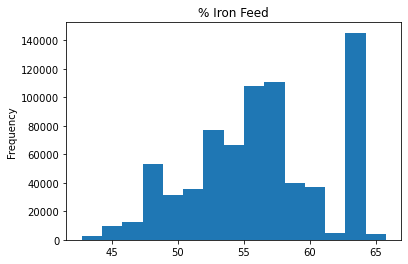

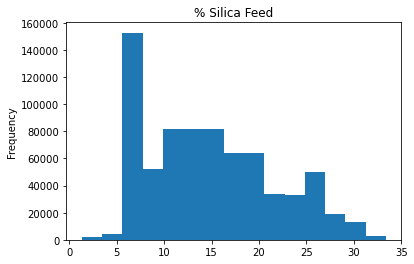

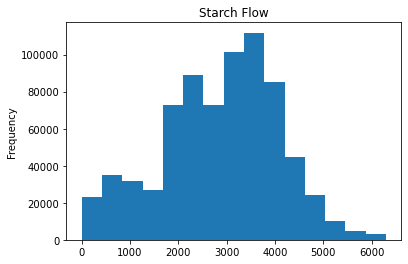

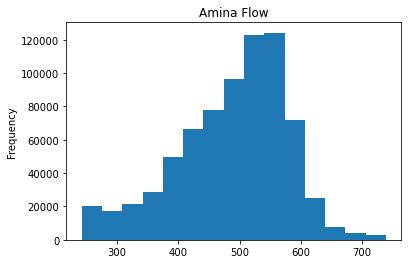

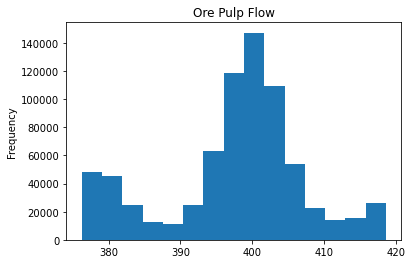

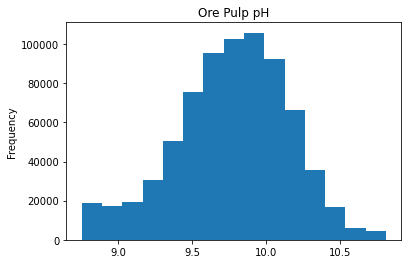

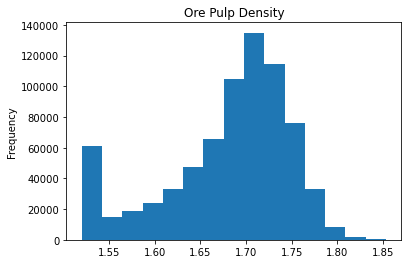

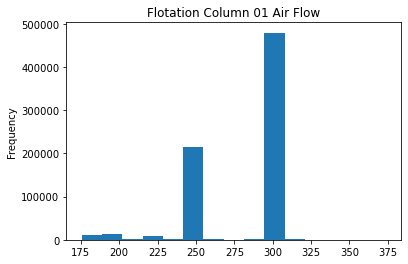

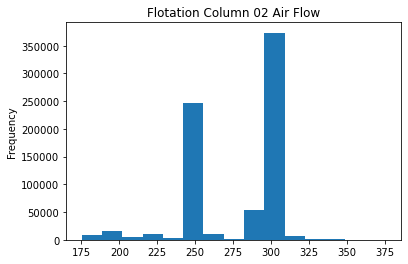

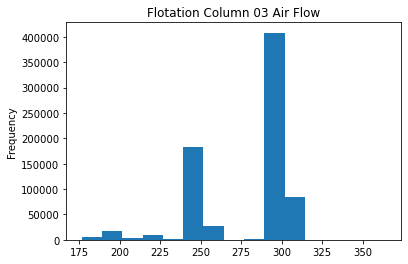

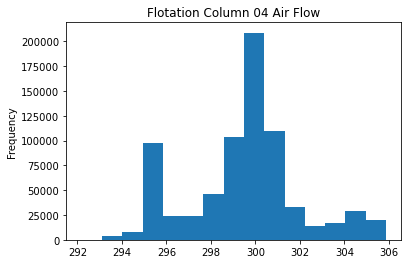

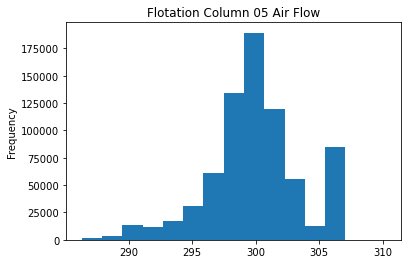

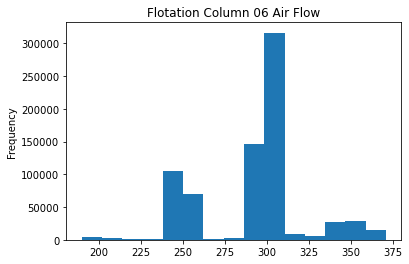

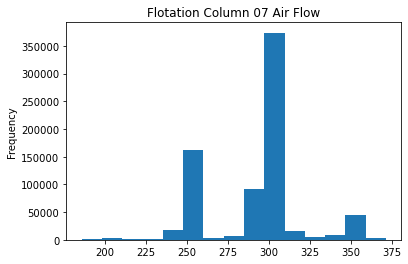

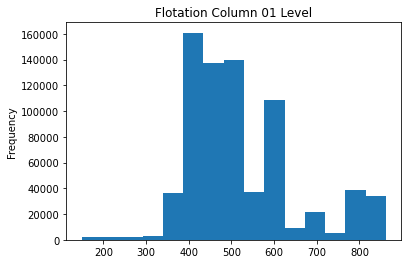

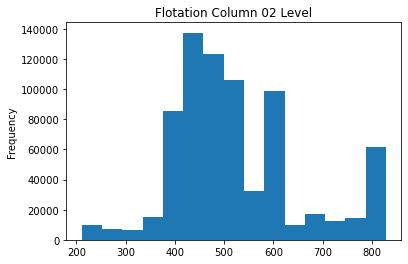

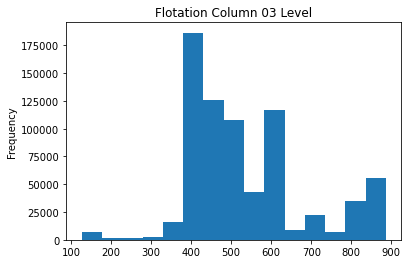

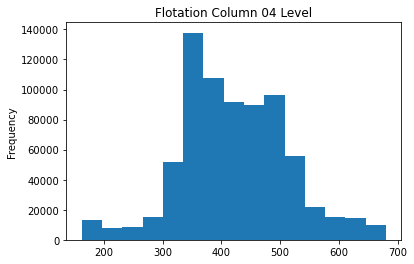

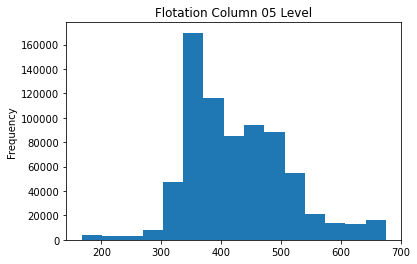

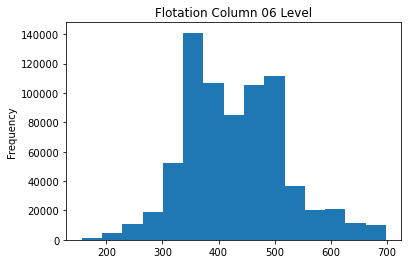

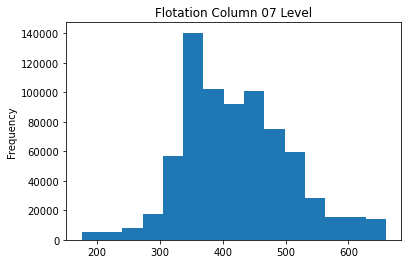

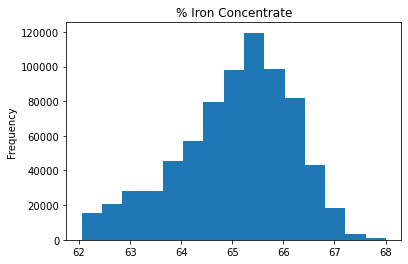

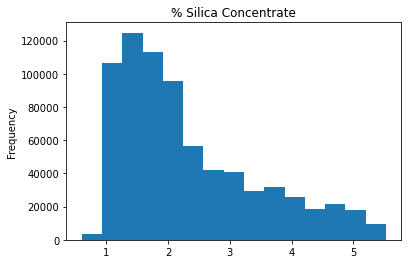

In [84]:
for item in df.keys():
    df[item].plot(title = item, kind = 'hist', bins = 15)
    plt.show()

# ETL

# Modelling

In [115]:
target_1, target_2 = df['% Iron Concentrate'].copy(), df['% Silica Concentrate'].copy()
feature = df.iloc[:,0:-2].copy()

In [121]:
train_X, test_X, train_y, test_y = train_test_split(feature, target_1)

In [122]:
train_X.shape, train_y.shape, test_X.shape, test_y.shape

((553089, 21), (553089,), (184364, 21), (184364,))

In [132]:
LR = RandomForestRegressor()
Scaler = PolynomialFeatures()
Scaler.fit(train_X)
temp_train_X = Scaler.transform(train_X)
LR.fit(temp_train_X, train_y)
temp_test_X = Scaler.transform(test_X)
LR.score(test_X, test_y)

KeyboardInterrupt: 

In [ ]:
model_list = [LinearRegression(), Ridge(), SGDRegressor(), RandomForestRegressor()]
scaler_list = [MinMaxScaler()]

for model in model_list:
    Model = model
    Scaler = scaler_list[0]
    Scaler.fit(train_X)
    temp_train_X = Scaler.transform(train_X)
    Model.fit(temp_train_X, train_y)
    temp_test_X = Scaler.transform(test_X)
    print('model = ', model)
    print(Model.score(test_X, test_y))
    
    preds = model.predict(test_X)
    rmse = mean_squared_error(test_y, preds, squared=False)
    print('rmse = ', rmse)


model =  LinearRegression()
-179797.11062931098
rmse =  474.3802841966306
model =  Ridge()
-179833.69759105836
rmse =  474.42854735800245
model =  SGDRegressor()
-312180.92411259044
rmse =  625.0833710119624


# Explanation